In [53]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import os
import numpy as np

### Covid Trends Dataset Analysis. Dataset is taken from Google Trends

In [5]:
df = pd.read_csv("multiTimeline.csv")  # Reading Dataset

In [9]:
rows_num, cols_num = df.shape
print(rows_num)
print(cols_num)

53
1


In [11]:
df.head(10)

,Категория: Все категории
Неделя,COVID-19: (По всему миру)
2020-03-01,11
2020-03-08,35
2020-03-15,77
2020-03-22,100
2020-03-29,92
2020-04-05,86
2020-04-12,75
2020-04-19,69
2020-04-26,64


In [25]:
header = df.columns[0]
#sns.lineplot(df["Неделя"], df[""])
x = np.array([i for i in range(1, rows_num)])  # Week nums
y = np.array([int(df[header][i]) for i in x])  # values

Chart with Covid popularity by Week Number

Text(0, 0.5, 'Popularity')

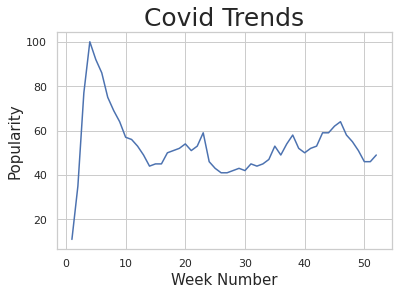

In [44]:
sns.set_theme(style='whitegrid')
chart = sns.lineplot(x=x, y=y)
chart.set_title("Covid Trends", fontsize=25)
chart.set_xlabel("Week Number", fontsize=15)
chart.set_ylabel("Popularity", fontsize=15)

Math Expectation:

In [47]:
M = y.mean()
print("Mean is", M)

Mean is 53.40384615384615


### **Let's visualize data distribution with a box plot**

/home/dimdimi4/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Box Plot for Trends')

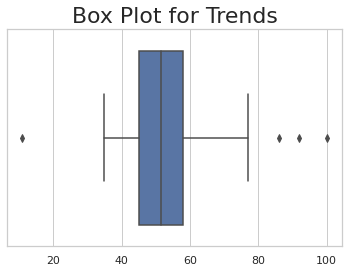

In [52]:
box_plot = sns.boxplot(y)
box_plot.set_title("Box Plot for Trends", fontsize=22)

### **Q1, Q3, IQR and median manual calculations**
Q1 is a first Quartile (25%)  
Q2 or median is a second Quartile (50%)  
Q3 is a third Quartile (75%)
IQR = Q3 - Q1  
**And we also will need 1.5 * IQR for max and min values**


In [55]:
Q1 = np.percentile(y, 25)  # 25% of data
Q2 = np.percentile(y, 50)  # median
Q3 = np.percentile(y, 75)  # 75$ of data
IQR = Q3 - Q1  # Interquartile Range
pd.DataFrame({"Q1": [Q1], 
              "Median": [Q2], 
              "Q3": [Q3], 
              "IQR": [IQR]})


,Q1,Median,Q3,IQR
0,45.0,51.5,58.0,13.0


### **Counting stat max and stat min**

In [59]:
stat_min = Q1 - 1.5 * IQR
stat_max = Q3 + 1.5 * IQR
pd.DataFrame({"Stat Min": [stat_min],
              "Stat Max": [stat_max]})

,Stat Min,Stat Max
0,25.5,77.5


### **Visualising Stat Max and Stat Min in a chart**

Text(0, 0.5, 'Popularity')

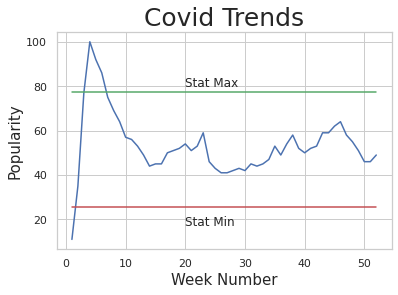

In [79]:
stat_min_list = [stat_min for i in x]  # values for stat min line
stat_max_list = [stat_max for i in x]  # values for stat max line
sns.set_theme(style='whitegrid')  # sets Grid
chart = sns.lineplot(x=x, y=y)  # Our Main Chart
stat_min_chart = sns.lineplot(x=x, y=stat_min_list, color="r")  # Stat min line
stat_min_chart.text(20, 17, "Stat Min")  # Adds text to Stat Min line 
stat_max_chart = sns.lineplot(x=x, y=stat_max_list, color="g")  # Stat min line
stat_min_chart.text(20, 80, "Stat Max")  # Adds text to Stat Max line 
# Graph styles:
chart.set_title("Covid Trends", fontsize=25)
chart.set_xlabel("Week Number", fontsize=15)
chart.set_ylabel("Popularity", fontsize=15)